Dataset = https://www.kaggle.com/sobhanmoosavi/us-accidents

## Part Zero - Initial Imports and Options

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
accidents_original = pd.read_csv(r"C:\Users\Gareth\Desktop\Ironhack\Week_Five\Project-Week-5-Your-Own-Project\Database\US_Accidents_Dec19.csv")

In [44]:
data = pd.read_csv(r"C:\Users\Gareth\Desktop\Ironhack\Week_Five\Project-Week-5-Your-Own-Project\Database\US_Accidents_Dec19.csv")

In [29]:
pd.set_option('display.max_columns', None)

## Part One - Data Cleaning

### Data wrangling - converting objects to the correct type, dropping columns where unnessecary. 

In [45]:
data.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [31]:
data['Start_Time'].dtypes

dtype('O')

In [47]:
data['Start_Time'] = pd.to_datetime(data['Start_Time'])
data['End_Time'] = pd.to_datetime(data['End_Time'])

In [48]:
data['Start_Time'] = data['Start_Time'].dt.normalize()
data['End_Time'] = data['End_Time'].dt.normalize()

In [49]:
data['Start_Time'].dtypes

dtype('<M8[ns]')

In [50]:
data['End_Time'].dtypes

dtype('<M8[ns]')

In [51]:
data.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08,2016-02-08,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08,2016-02-08,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08,2016-02-08,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08,2016-02-08,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08,2016-02-08,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


### Select timeframe of one year. 

In [52]:
data_year = data[(data['Start_Time'] > '2016-08-23') &
                (data['Start_Time'] <= '2019-08-23')]

### Which columns have null values?

In [53]:
data_year.isnull().sum()

ID                             0
Source                         0
TMC                       530404
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  1887814
End_Lng                  1887814
Distance(mi)                   0
Description                    1
Number                   1549540
Street                         0
Side                           0
City                          61
County                         0
State                          0
Zipcode                      716
Country                        0
Timezone                    2544
Airport_Code                4725
Weather_Timestamp          30560
Temperature(F)             46151
Wind_Chill(F)            1686162
Humidity(%)                48566
Pressure(in)               40530
Visibility(mi)             55057
Wind_Direction             34610
Wind_Speed(mph)           405389
Precipitat

### Drop columns that aren't needed for our study.

In [12]:
data_year = data_year.drop(columns = ['Number','End_Time','Wind_Chill(F)','Street','Timezone','Airport_Code','End_Lat','End_Lng','Pressure(in)','Humidity(%)'])

### Sort by Severity of Accident (4 = Most Severe, 1 = Least Severe)

In [54]:
data_year = data_year.sort_values(by = 'Severity', ascending = False)

In [55]:
data_year['Start_Time'].min()

Timestamp('2016-08-24 00:00:00')

### Export to CSV to reduce dataset size for easier loading with Tableau.

In [177]:
data_year.to_csv(r"C:\Users\Gareth\Desktop\Ironhack\Week_Five\Project-Week-5-Your-Own-Project\Database\DataYearAccidents.csv")

### Severity over Time

In [56]:
severity_time = data_year[['Severity','Start_Time']]
severity_time['Start_Time'] = severity_time['Start_Time'].dt.date

severity_time.head()

C:\Users\Gareth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Severity,Start_Time
2814574,4,2018-02-09
2269426,4,2016-10-03
2688102,4,2018-12-25
2688103,4,2018-12-25
2688104,4,2018-12-25


In [79]:
sev_count = severity_time.groupby(severity_time['Start_Time'])['Severity'].value_counts()
sev_count.head()

Start_Time  Severity
2016-08-24  2           1606
            3            634
            4             74
            1              3
2016-08-25  2           1364
Name: Severity, dtype: int64

In [92]:
sev_count = severity_time.groupby(severity_time['Start_Time'])['Severity'].value_counts().unstack(level = 1)
sev_count.reset_index(level=0, inplace=True)
sev_count

Severity,Start_Time,1,2,3,4
0,2016-08-24,3.0,1606.0,634.0,74.0
1,2016-08-25,NaN,1364.0,652.0,62.0
2,2016-08-26,3.0,1572.0,680.0,73.0
3,2016-08-27,2.0,355.0,308.0,38.0
4,2016-08-28,2.0,326.0,298.0,61.0
...,...,...,...,...,...
1090,2019-08-19,2.0,1923.0,638.0,82.0
1091,2019-08-20,NaN,2200.0,663.0,88.0
1092,2019-08-21,NaN,2103.0,676.0,71.0
1093,2019-08-22,NaN,2168.0,734.0,81.0


In [96]:
sns.lineplot(x = sev_count['Severity'])

KeyError: 'Severity'

### Count Accidents By State

In [97]:
accidents_by_state = [data_year[data_year['State'] == i].count()['ID'] 
                      for i in data_year.State.unique()]

accidents_by_state.sort(reverse = True)

In [98]:
states = data_year.State.unique()

In [99]:
state_severity = data_year[['Severity', 'ID', 'State']]
state_severity

,Severity,ID,State
2814574,4,A-2814598,NY
2269426,4,A-2269450,TX
2688102,4,A-2688126,AZ
2688103,4,A-2688127,AZ
2688104,4,A-2688128,AZ
...,...,...,...
146407,1,A-146409,GA
1393931,1,A-1393947,TX
332233,1,A-332236,TX
376988,1,A-376992,OH


In [100]:
grouped = state_severity.groupby(['State']).sum().reset_index()
grouped.head()

,State,Severity
0,AL,70186
1,AR,4054
2,AZ,120689
3,CA,1107610
4,CO,85333


In [101]:
sort_grouped = grouped.sort_values(by = 'Severity', ascending = False)
sort_grouped.head()

,State,Severity
3,CA,1107610
41,TX,583689
8,FL,456193
32,NY,284274
38,SC,272430


Text(0, 0.5, '# of Accidents')

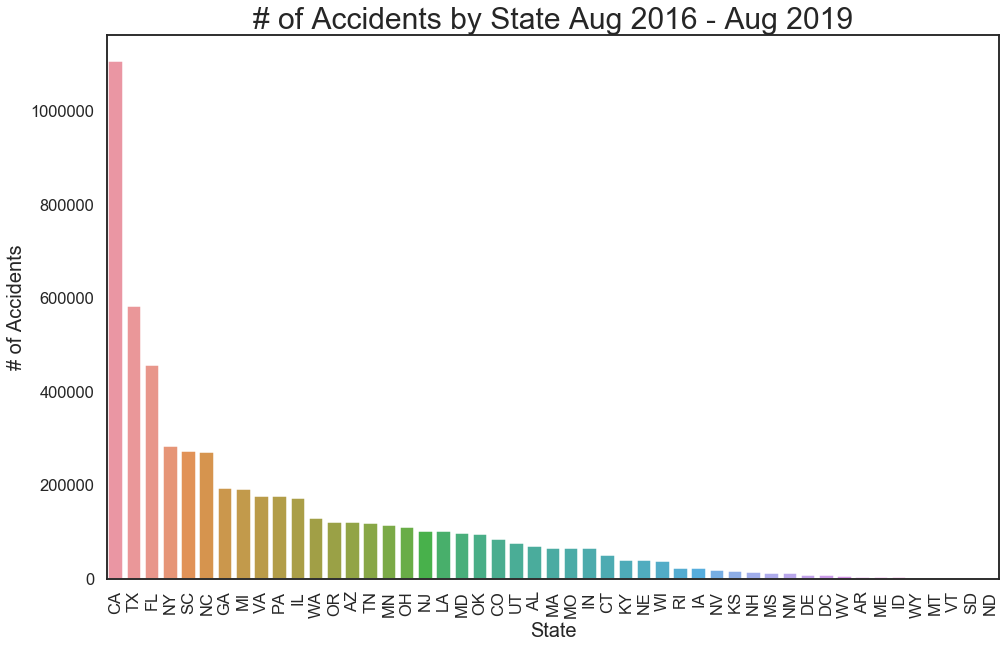

In [103]:
sns.set(style="white", context="talk")

fig, ax = plt.subplots(figsize=(16,10)) 
sns.barplot(x = sort_grouped['State'], y = sort_grouped['Severity'])
plt.xticks(rotation=90)
plt.title('# of Accidents by State Aug 2016 - Aug 2019', fontsize = 30)
plt.xlabel('State', fontsize = 20)
plt.ylabel('# of Accidents', fontsize = 20)

### Most Common Weather Conditions during an Accident

Text(0.5, 1.0, 'Most Common Weather Conditions at the time of Accident')

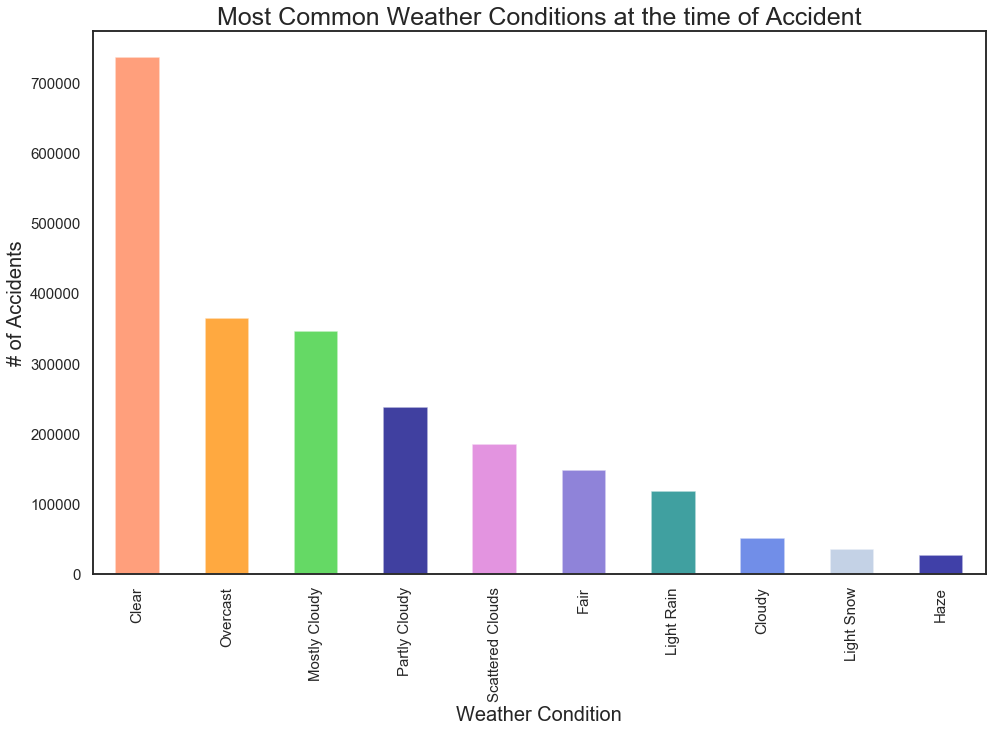

In [105]:
sns.set(style="white", context="talk")

fig, ax = plt.subplots(figsize=(16,10)) 
data_year['Weather_Condition'].value_counts().head(10).plot.bar(color = ['coral', 
                                                                         'darkorange',
                                                                         'limegreen', 
                                                                         'navy', 
                                                                         'orchid',
                                                                         'slateblue',
                                                                        'teal',
                                                                        'royalblue',
                                                                        'lightsteelblue',
                                                                        'darkblue'],
                                                               alpha = 0.75)
plt.xlabel('Weather Condition', fontsize = 20)
plt.ylabel('# of Accidents', fontsize = 20)
ax.tick_params(labelsize= 15)
plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.title('Most Common Weather Conditions at the time of Accident', fontsize = 25)

### Create columns to split Weather Conditions which contain ' / '

In [106]:
data_year['Weather_Condition 1'] = data_year['Weather_Condition'].str.split('/').str[0].str.strip()
data_year['Weather_Condition 2'] = data_year['Weather_Condition'].str.split('/').str[1].str.strip()
data_year['Weather_Condition 3'] = data_year['Weather_Condition'].str.split('/').str[2].str.strip()
#data_year['Weather_Condition 4'] = data_year['Weather_Condition'].str.split('and').str[3]
#data_year['Weather_Condition 5'] = data_year['Weather_Condition'].str.split('and').str[4]

data_year.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weather_Condition 1,Weather_Condition 2,Weather_Condition 3
2814574,A-2814598,Bing,NaN,4,2018-02-09,2018-02-09,42.353330,-74.070120,42.335190,-74.051320,1.579,Closed at CR-31/Roosevelt Ave - Road closed du...,399.0,Sunside Rd,L,Cairo,Greene,NY,12413-2009,US,US/Eastern,KALB,2018-02-09 08:51:00,9.0,NaN,84.0,30.54,10.0,Calm,NaN,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,Mostly Cloudy,NaN,NaN
2269426,A-2269450,Bing,NaN,4,2016-10-03,2016-10-03,30.074080,-95.503131,30.073888,-95.495212,0.474,Closed between FM-2920 and I-45/North Fwy - Ro...,5358.0,FM 2920 Rd,R,Spring,Harris,TX,77388-3005,US,US/Central,KDWH,2016-10-03 16:53:00,84.9,NaN,40.0,29.85,10.0,Variable,3.5,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,Clear,NaN,NaN
2688102,A-2688126,Bing,NaN,4,2018-12-25,2018-12-25,33.556060,-112.112250,33.558260,-112.113320,0.164,Ramp closed to Northern Ave/Exit 206 - Road cl...,8145.0,N Black Canyon Hwy,R,Phoenix,Maricopa,AZ,85021-4857,US,US/Mountain,KDVT,2018-12-25 00:53:00,52.0,NaN,43.0,29.81,10.0,NNE,3.5,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,Clear,NaN,NaN
2688103,A-2688127,Bing,NaN,4,2018-12-25,2018-12-25,33.386550,-111.759640,33.386390,-111.793760,1.968,Closed between Val Vista Dr/Exit 184 and Gilbe...,NaN,Superstition Fwy W,R,Mesa,Maricopa,AZ,85204,US,US/Mountain,KFFZ,2018-12-25 02:54:00,50.0,NaN,46.0,29.79,10.0,NE,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,Clear,NaN,NaN
2688104,A-2688128,Bing,NaN,4,2018-12-25,2018-12-25,34.552714,-112.426958,34.551772,-112.432052,0.297,Closed at Yavpe Conn - Road closed due to acci...,2240.0,E State Route 69,L,Prescott,Yavapai,AZ,86301,US,US/Mountain,KPRC,2018-12-25 19:53:00,35.1,27.9,76.0,29.70,9.0,SW,9.2,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,Clear,NaN,NaN


#### Check to see if it's worked...

In [108]:
data_year.loc[data_year['Weather_Condition'] == 'Sand / Dust Whirlwinds / Windy']

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weather_Condition 1,Weather_Condition 2,Weather_Condition 3
796576,A-796585,MapQuest,201.0,2,2019-07-11,2019-07-11,33.379162,-111.753967,NaN,NaN,0.0,Accident on Baseline Rd at Val Vista Dr.,NaN,E Baseline Rd,R,Gilbert,Maricopa,AZ,85234,US,US/Mountain,KIWA,2019-07-11 17:50:00,109.0,109.0,9.0,28.34,10.0,WNW,24.0,0.0,Sand / Dust Whirlwinds / Windy,False,False,True,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,Sand,Dust Whirlwinds,Windy
796573,A-796582,MapQuest,201.0,2,2019-07-11,2019-07-11,33.553162,-112.151573,NaN,NaN,0.0,Accident on 43rd Ave at Northern Ave.,8002.0,N 43rd Ave,L,Glendale,Maricopa,AZ,85302-6601,US,US/Mountain,KGEU,2019-07-11 16:58:00,111.0,111.0,8.0,28.60,10.0,WSW,22.0,0.0,Sand / Dust Whirlwinds / Windy,False,False,True,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,Sand,Dust Whirlwinds,Windy


### Splitting Weather Conditions + Severity into New DF

In [109]:
df_unmerged = data_year[['Severity',
                         'Weather_Condition 1',
                         'Weather_Condition 2',
                         'Weather_Condition 3']]

df_unmerged 

,Severity,Weather_Condition 1,Weather_Condition 2,Weather_Condition 3
2814574,4,Mostly Cloudy,NaN,NaN
2269426,4,Clear,NaN,NaN
2688102,4,Clear,NaN,NaN
2688103,4,Clear,NaN,NaN
2688104,4,Clear,NaN,NaN
...,...,...,...,...
146407,1,Clear,NaN,NaN
1393931,1,Light Thunderstorms and Rain,NaN,NaN
332233,1,Clear,NaN,NaN
376988,1,Mostly Cloudy,NaN,NaN


In [110]:
df_unmerged = df_unmerged.loc[df_unmerged['Weather_Condition 1'].notna()]

In [111]:
df_unmerged.shape

(2362759, 4)

In [112]:
df_unmerged.isna().sum()

Severity                     0
Weather_Condition 1          0
Weather_Condition 2    2356874
Weather_Condition 3    2362756
dtype: int64

In [113]:
df_unmerged.drop(columns = ['Weather_Condition 2', 'Weather_Condition 3'], inplace = True)

C:\Users\Gareth\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Export to CSV as previous methods are resource intensive. 

In [114]:
df_unmerged.to_csv(r"C:\Users\Gareth\Desktop\Ironhack\Week_Five\Project-Week-5-Your-Own-Project\Database\Dummies_Data.csv")

### Creating Dummies for Correlation

In [115]:
dummies = pd.get_dummies(df_unmerged)
dummies.head()

,Severity,Weather_Condition 1_Blowing Dust,Weather_Condition 1_Blowing Snow,Weather_Condition 1_Clear,Weather_Condition 1_Cloudy,Weather_Condition 1_Drizzle,Weather_Condition 1_Drizzle and Fog,Weather_Condition 1_Dust Whirls,Weather_Condition 1_Fair,Weather_Condition 1_Fog,Weather_Condition 1_Freezing Rain,Weather_Condition 1_Funnel Cloud,Weather_Condition 1_Hail,Weather_Condition 1_Haze,Weather_Condition 1_Heavy Blowing Snow,Weather_Condition 1_Heavy Drizzle,Weather_Condition 1_Heavy Freezing Drizzle,Weather_Condition 1_Heavy Freezing Rain,Weather_Condition 1_Heavy Ice Pellets,Weather_Condition 1_Heavy Rain,Weather_Condition 1_Heavy Rain Showers,Weather_Condition 1_Heavy Smoke,Weather_Condition 1_Heavy Snow,Weather_Condition 1_Heavy Snow with Thunder,Weather_Condition 1_Heavy T-Storm,Weather_Condition 1_Heavy Thunderstorms and Rain,Weather_Condition 1_Heavy Thunderstorms and Snow,Weather_Condition 1_Heavy Thunderstorms with Small Hail,Weather_Condition 1_Ice Pellets,Weather_Condition 1_Light Blowing Snow,Weather_Condition 1_Light Drizzle,Weather_Condition 1_Light Fog,Weather_Condition 1_Light Freezing Drizzle,Weather_Condition 1_Light Freezing Fog,Weather_Condition 1_Light Freezing Rain,Weather_Condition 1_Light Hail,Weather_Condition 1_Light Haze,Weather_Condition 1_Light Ice Pellets,Weather_Condition 1_Light Rain,Weather_Condition 1_Light Rain Shower,Weather_Condition 1_Light Rain Showers,Weather_Condition 1_Light Rain with Thunder,Weather_Condition 1_Light Snow,Weather_Condition 1_Light Snow Grains,Weather_Condition 1_Light Snow Showers,Weather_Condition 1_Light Snow and Sleet,Weather_Condition 1_Light Snow with Thunder,Weather_Condition 1_Light Thunderstorm,Weather_Condition 1_Light Thunderstorms and Rain,Weather_Condition 1_Light Thunderstorms and Snow,Weather_Condition 1_Low Drifting Snow,Weather_Condition 1_Mist,Weather_Condition 1_Mostly Cloudy,Weather_Condition 1_N,Weather_Condition 1_Overcast,Weather_Condition 1_Partly Cloudy,Weather_Condition 1_Patches of Fog,Weather_Condition 1_Rain,Weather_Condition 1_Rain Shower,Weather_Condition 1_Rain Showers,Weather_Condition 1_Sand,Weather_Condition 1_Scattered Clouds,Weather_Condition 1_Shallow Fog,Weather_Condition 1_Showers in the Vicinity,Weather_Condition 1_Small Hail,Weather_Condition 1_Smoke,Weather_Condition 1_Snow,Weather_Condition 1_Snow Grains,Weather_Condition 1_Snow Showers,Weather_Condition 1_Snow and Sleet,Weather_Condition 1_Snow and Thunder,Weather_Condition 1_Squalls,Weather_Condition 1_T-Storm,Weather_Condition 1_Thunder,Weather_Condition 1_Thunder and Hail,Weather_Condition 1_Thunder in the Vicinity,Weather_Condition 1_Thunderstorm,Weather_Condition 1_Thunderstorms and Rain,Weather_Condition 1_Thunderstorms and Snow,Weather_Condition 1_Tornado,Weather_Condition 1_Volcanic Ash,Weather_Condition 1_Widespread Dust,Weather_Condition 1_Wintry Mix
2814574,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2269426,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2688102,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2688103,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2688104,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [116]:
pd.DataFrame(dummies.sum().sort_values(ascending = False))

,0
Severity,5612529
Weather_Condition 1_Clear,737102
Weather_Condition 1_Overcast,365212
Weather_Condition 1_Mostly Cloudy,348138
Weather_Condition 1_Partly Cloudy,238348
...,...
Weather_Condition 1_Dust Whirls,1
Weather_Condition 1_Freezing Rain,1
Weather_Condition 1_Snow and Thunder,1
Weather_Condition 1_Heavy Smoke,1


In [117]:
dummies['Severity'].corr(dummies['Weather_Condition 1_Clear'])

-0.010620256102224272

### Finding High (> 0.01 or <0.01) Correlation

In [118]:
columns = list(dummies.columns)
columns.remove('Severity')

correlation_values = []
weather_types = []

for column in columns:
    corr = dummies['Severity'].corr(dummies[column])
    if corr >= 0.01 or corr <= -0.01:
        print(f'The correlation for {column} = {corr}')
        print('------------------------------------------------------')
        weather_types.append(column)
        correlation_values.append(corr)


The correlation for Weather_Condition 1_Clear = -0.010620256102224272
------------------------------------------------------
The correlation for Weather_Condition 1_Fair = -0.019425413302361846
------------------------------------------------------
The correlation for Weather_Condition 1_Light Freezing Rain = 0.01086585905570625
------------------------------------------------------
The correlation for Weather_Condition 1_Light Rain = 0.01062488178079427
------------------------------------------------------
The correlation for Weather_Condition 1_Light Snow = 0.025837266016054863
------------------------------------------------------
The correlation for Weather_Condition 1_Rain = 0.010703213163315359
------------------------------------------------------
The correlation for Weather_Condition 1_Snow = 0.010952443777723924
------------------------------------------------------


In [119]:
weather_types = [item.replace('Weather_Condition 1_','') for item in weather_types]

Text(0, 0.5, 'Correlation')

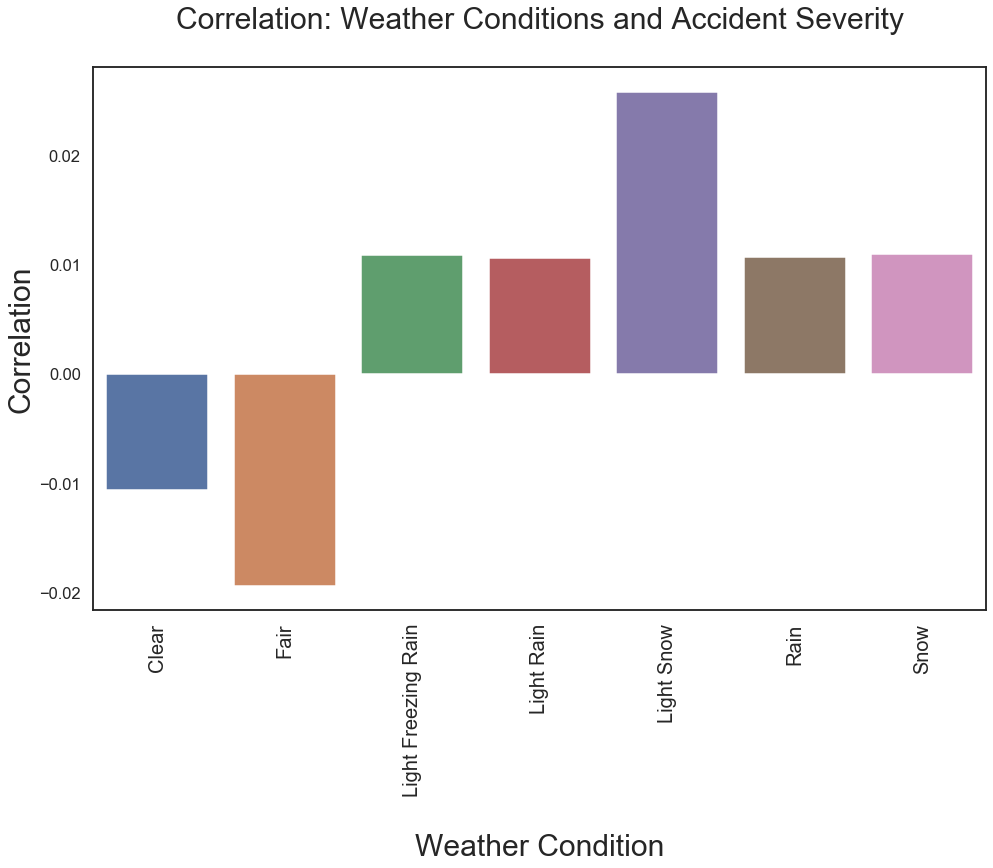

In [120]:
sns.set(style="white", context="talk")
fig, ax = plt.subplots(figsize=(16,10)) 
sns.barplot(x = weather_types, y = correlation_values)
plt.xticks(rotation=90)
plt.title('Correlation: Weather Conditions and Accident Severity\n', fontsize = 30)
plt.xlabel('\nWeather Condition', fontsize = 30)
plt.xticks(fontsize = 20)
plt.ylabel('Correlation', fontsize = 30)

### Visualization

In [200]:
data_year[data_year == True].count(axis = 1).sum()

332342